# Texas counties, visually

Visualizing all 254 counties in TX by land area, population, and population density. Dataset from Wikipedia: [List of counties in Texas](https://en.wikipedia.org/wiki/List_of_counties_in_Texas).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
from urllib.request import urlopen
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore') 

### 1. Download the dataset

In [2]:
# scrape and collect the county-level data on Wikipedia
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_counties_in_Texas')[1]
df

,County,FIPS code[8],County seat[9],Est.[9],Origin,Etymology,Population[10],Area[9],Map
0,Anderson County,1,Palestine,1846,Houston County,"Kenneth Lewis Anderson (1805–1845), the last v...",58402,"1,071 sq mi (2,774 km2)",NaN
1,Andrews County,3,Andrews,1876,Bexar County,"Richard Andrews (1800–1835), the first Texan s...",18440,"1,501 sq mi (3,888 km2)",NaN
2,Angelina County,5,Lufkin,1846,Nacogdoches County,A Hainai Native American woman who assisted ea...,86506,"802 sq mi (2,077 km2)",NaN
3,Aransas County,7,Rockport,1871,Refugio County,"Aransas Bay, named in turn for an early Spanis...",24510,252 sq mi (653 km2),NaN
4,Archer County,9,Archer City,1858,Fannin County,"Branch Tanner Archer, a commissioner for the R...",8681,"910 sq mi (2,357 km2)",NaN
...,...,...,...,...,...,...,...,...,...
249,Wood County,499,Quitman,1850,Van Zandt County,"George Tyler Wood, the second governor of Texa...",45875,"650 sq mi (1,683 km2)",NaN
250,Yoakum County,501,Plains,1876,Bexar County,"Henderson King Yoakum (1810–1856), soldier, at...",7607,"800 sq mi (2,072 km2)",NaN
251,Young County,503,Graham,1856,Bosque County and Fannin County,"William Cocke Young, early Texas settler, atto...",17977,"922 sq mi (2,388 km2)",NaN
252,Zapata County,505,Zapata,1858,Starr County and Webb County,"José Antonio Zapata, a local rancher and colon...",13908,"997 sq mi (2,582 km2)",NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   County          254 non-null    object 
 1   FIPS code[8]    254 non-null    int64  
 2   County seat[9]  254 non-null    object 
 3   Est.[9]         254 non-null    int64  
 4   Origin          254 non-null    object 
 5   Etymology       254 non-null    object 
 6   Population[10]  254 non-null    int64  
 7   Area[9]         254 non-null    object 
 8   Map             0 non-null      float64
dtypes: float64(1), int64(3), object(5)
memory usage: 18.0+ KB


### 2. Clean the data

#### Remove the unneeded columns:

In [4]:
cols = [2, 3, 4, 5, 8]
df.drop(df.columns[cols], axis=1, inplace=True)
df

,County,FIPS code[8],Population[10],Area[9]
0,Anderson County,1,58402,"1,071 sq mi (2,774 km2)"
1,Andrews County,3,18440,"1,501 sq mi (3,888 km2)"
2,Angelina County,5,86506,"802 sq mi (2,077 km2)"
3,Aransas County,7,24510,252 sq mi (653 km2)
4,Archer County,9,8681,"910 sq mi (2,357 km2)"
...,...,...,...,...
249,Wood County,499,45875,"650 sq mi (1,683 km2)"
250,Yoakum County,501,7607,"800 sq mi (2,072 km2)"
251,Young County,503,17977,"922 sq mi (2,388 km2)"
252,Zapata County,505,13908,"997 sq mi (2,582 km2)"


In [5]:
df.columns

Index(['County', 'FIPS code[8]', 'Population[10]', 'Area[9]'], dtype='object')

#### Rename the columns:

In [6]:
cols = ['county', 'fips_code', 'population', 'area_sq_mi']
df.columns = cols
df

,county,fips_code,population,area_sq_mi
0,Anderson County,1,58402,"1,071 sq mi (2,774 km2)"
1,Andrews County,3,18440,"1,501 sq mi (3,888 km2)"
2,Angelina County,5,86506,"802 sq mi (2,077 km2)"
3,Aransas County,7,24510,252 sq mi (653 km2)
4,Archer County,9,8681,"910 sq mi (2,357 km2)"
...,...,...,...,...
249,Wood County,499,45875,"650 sq mi (1,683 km2)"
250,Yoakum County,501,7607,"800 sq mi (2,072 km2)"
251,Young County,503,17977,"922 sq mi (2,388 km2)"
252,Zapata County,505,13908,"997 sq mi (2,582 km2)"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      254 non-null    object
 1   fips_code   254 non-null    int64 
 2   population  254 non-null    int64 
 3   area_sq_mi  254 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.1+ KB


#### Convert `fips_code` column from `int` to `str`:

In [8]:
df['fips_code'] = df['fips_code'].astype(str)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      254 non-null    object
 1   fips_code   254 non-null    object
 2   population  254 non-null    int64 
 3   area_sq_mi  254 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.1+ KB


In [10]:
df

,county,fips_code,population,area_sq_mi
0,Anderson County,1,58402,"1,071 sq mi (2,774 km2)"
1,Andrews County,3,18440,"1,501 sq mi (3,888 km2)"
2,Angelina County,5,86506,"802 sq mi (2,077 km2)"
3,Aransas County,7,24510,252 sq mi (653 km2)
4,Archer County,9,8681,"910 sq mi (2,357 km2)"
...,...,...,...,...
249,Wood County,499,45875,"650 sq mi (1,683 km2)"
250,Yoakum County,501,7607,"800 sq mi (2,072 km2)"
251,Young County,503,17977,"922 sq mi (2,388 km2)"
252,Zapata County,505,13908,"997 sq mi (2,582 km2)"


#### Left-pad the `fips_code` values with `0` and then prepend the TX state code `48` to them:

In [11]:
df['fips_code'] = df['fips_code'].str.pad(width=3, side='left', fillchar='0')
df['fips_code'] = '48' + df['fips_code']

In [12]:
df

,county,fips_code,population,area_sq_mi
0,Anderson County,48001,58402,"1,071 sq mi (2,774 km2)"
1,Andrews County,48003,18440,"1,501 sq mi (3,888 km2)"
2,Angelina County,48005,86506,"802 sq mi (2,077 km2)"
3,Aransas County,48007,24510,252 sq mi (653 km2)
4,Archer County,48009,8681,"910 sq mi (2,357 km2)"
...,...,...,...,...
249,Wood County,48499,45875,"650 sq mi (1,683 km2)"
250,Yoakum County,48501,7607,"800 sq mi (2,072 km2)"
251,Young County,48503,17977,"922 sq mi (2,388 km2)"
252,Zapata County,48505,13908,"997 sq mi (2,582 km2)"


#### Test query:

In [13]:
df.query('county=="Travis County"')

,county,fips_code,population,area_sq_mi
226,Travis County,48453,1305154,"989 sq mi (2,561 km2)"


#### Extract the sq mi values for the `area_sq_mi` column:

In [14]:
df.area_sq_mi.replace('\ssq(.*)$','', regex=True, inplace=True)
df.area_sq_mi.replace(',', '', regex=True, inplace=True)

In [15]:
df

,county,fips_code,population,area_sq_mi
0,Anderson County,48001,58402,1071
1,Andrews County,48003,18440,1501
2,Angelina County,48005,86506,802
3,Aransas County,48007,24510,252
4,Archer County,48009,8681,910
...,...,...,...,...
249,Wood County,48499,45875,650
250,Yoakum County,48501,7607,800
251,Young County,48503,17977,922
252,Zapata County,48505,13908,997


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      254 non-null    object
 1   fips_code   254 non-null    object
 2   population  254 non-null    int64 
 3   area_sq_mi  254 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.1+ KB


#### Convert the `area_sq_mi` column to `int`:

In [17]:
df['area_sq_mi'] = df['area_sq_mi'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      254 non-null    object
 1   fips_code   254 non-null    object
 2   population  254 non-null    int64 
 3   area_sq_mi  254 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 8.1+ KB


In [18]:
df

,county,fips_code,population,area_sq_mi
0,Anderson County,48001,58402,1071
1,Andrews County,48003,18440,1501
2,Angelina County,48005,86506,802
3,Aransas County,48007,24510,252
4,Archer County,48009,8681,910
...,...,...,...,...
249,Wood County,48499,45875,650
250,Yoakum County,48501,7607,800
251,Young County,48503,17977,922
252,Zapata County,48505,13908,997


#### Add population density `pop_per_sq_mi` column:

In [19]:
df['pop_per_sq_mi'] = (df['population'] / df['area_sq_mi']).round(2)
df

,county,fips_code,population,area_sq_mi,pop_per_sq_mi
0,Anderson County,48001,58402,1071,54.53
1,Andrews County,48003,18440,1501,12.29
2,Angelina County,48005,86506,802,107.86
3,Aransas County,48007,24510,252,97.26
4,Archer County,48009,8681,910,9.54
...,...,...,...,...,...
249,Wood County,48499,45875,650,70.58
250,Yoakum County,48501,7607,800,9.51
251,Young County,48503,17977,922,19.50
252,Zapata County,48505,13908,997,13.95


#### Remove `County` from the `county` column:

In [20]:
df.county.replace('\sCounty$','', regex=True, inplace=True)
df

,county,fips_code,population,area_sq_mi,pop_per_sq_mi
0,Anderson,48001,58402,1071,54.53
1,Andrews,48003,18440,1501,12.29
2,Angelina,48005,86506,802,107.86
3,Aransas,48007,24510,252,97.26
4,Archer,48009,8681,910,9.54
...,...,...,...,...,...
249,Wood,48499,45875,650,70.58
250,Yoakum,48501,7607,800,9.51
251,Young,48503,17977,922,19.50
252,Zapata,48505,13908,997,13.95


### 3. Save as `.csv`

In [21]:
df.to_csv('data/texas-counties.csv', index=False)

### 4. Visualize

In [22]:
df.pop_per_sq_mi.describe()

count     254.000000
mean      122.380157
std       356.122724
min         0.080000
25%         5.960000
50%        21.585000
75%        67.150000
max      2938.690000
Name: pop_per_sq_mi, dtype: float64

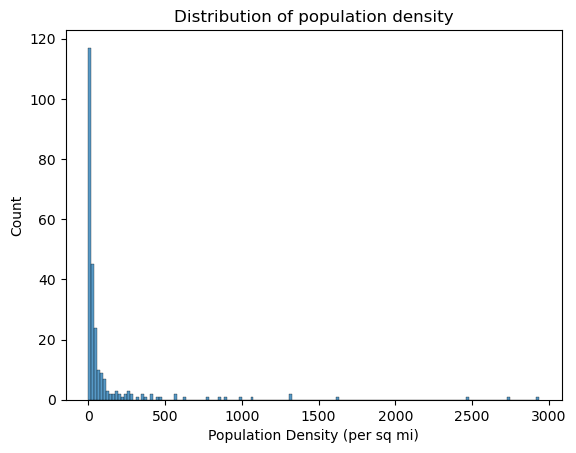

In [23]:
sns.histplot(data=df, x='pop_per_sq_mi')

plt.title('Distribution of population density')
plt.xlabel('Population Density (per sq mi)')

plt.show()

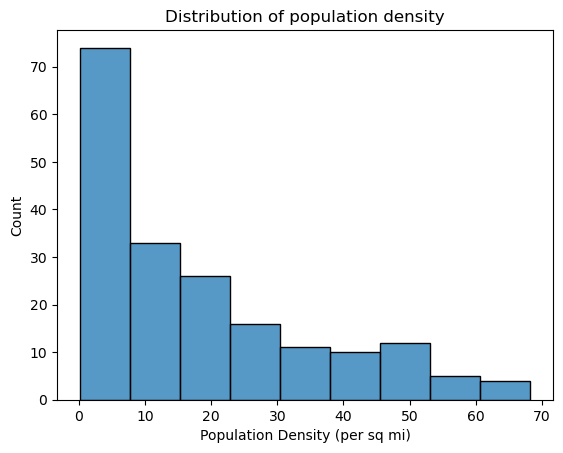

In [24]:
# `pop_per_sq_mi` less than the 75% percentile
sns.histplot(data=df.query('pop_per_sq_mi<70'), x='pop_per_sq_mi')

plt.title('Distribution of population density')
plt.xlabel('Population Density (per sq mi)')

plt.show()

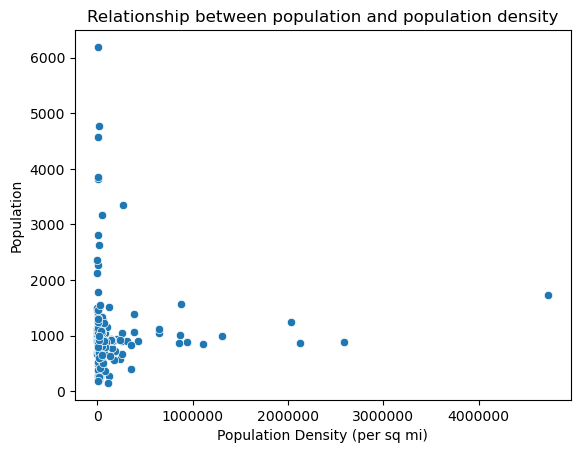

In [25]:
sns.scatterplot(x='population', y='area_sq_mi', data=df)

plt.title('Relationship between population and population density')
plt.ylabel('Population')
plt.xlabel('Population Density (per sq mi)')
plt.ticklabel_format(style='plain', axis='x')

plt.show()

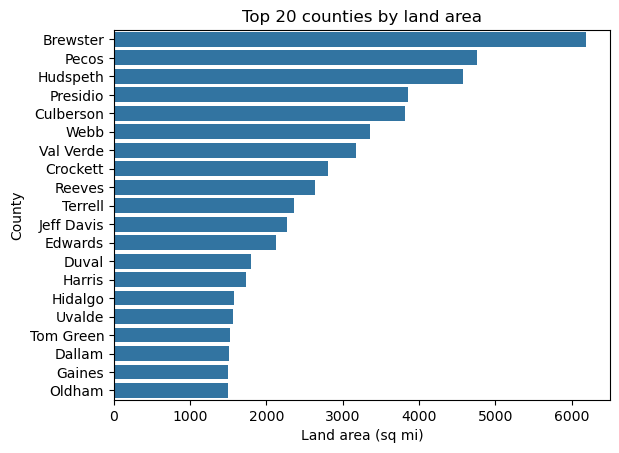

In [26]:
sns.barplot(x='area_sq_mi', y='county'
            , data=df.sort_values('area_sq_mi', ascending=False).head(20)
            , orient='h'
            , color='tab:blue')

plt.title('Top 20 counties by land area')
plt.ylabel('County')
plt.xlabel('Land area (sq mi)')

plt.show()

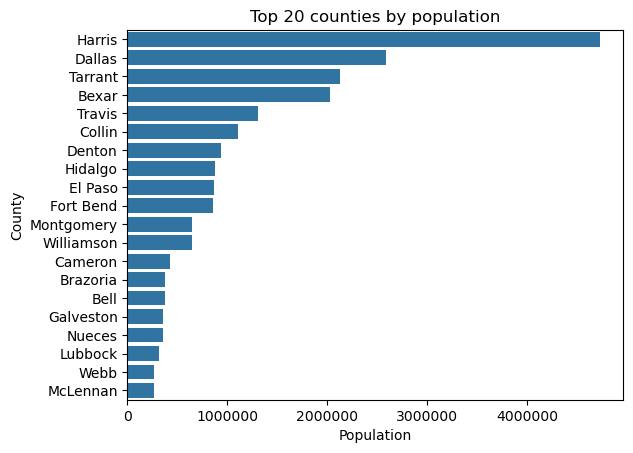

In [27]:
sns.barplot(x='population', y='county'
            , data=df.sort_values('population', ascending=False).head(20)
            , orient='h'
            , color='tab:blue')

plt.title('Top 20 counties by population')
plt.ylabel('County')
plt.xlabel('Population')
plt.ticklabel_format(style='plain', axis='x')

plt.show()

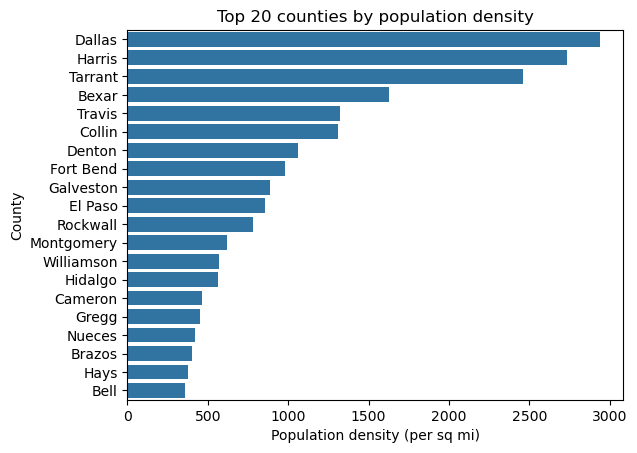

In [28]:
sns.barplot(x='pop_per_sq_mi', y='county'
            , data=df.sort_values('pop_per_sq_mi', ascending=False).head(20)
            , orient='h'
            , color='tab:blue')

plt.title('Top 20 counties by population density')
plt.ylabel('County')
plt.xlabel('Population density (per sq mi)')

plt.show()

In [29]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

tx_center = { 'lat': 31.13457812411393 , 'lon': -99.33520098658167 }
labels = { 'population': 'Population', 'area_sq_mi': 'Land area (sq mi)', 'pop_per_sq_mi': 'Population density (per sq mi)' }
hover_data = { 'fips_code': False, 'population': True, 'area_sq_mi': True, 'pop_per_sq_mi': True }

def plot_choropleth_map(df, col):
    fig = px.choropleth_mapbox(df, geojson=counties, locations='fips_code', color=col,
                               color_continuous_scale='YlGnBu',
                               mapbox_style='carto-positron',
                               zoom=4.2, center=tx_center,
                               opacity=0.5,
                               labels=labels,
                               hover_name='county',
                               hover_data=hover_data
                              )
    
    fig.update_layout(
        title_text = labels[col],
    )

    # fig.show(config={'displayModeBar': False, 'showTips': False})
    fig.write_image(f'images/{col}.png', width='800')
    fig.show(renderer='png', width='800')

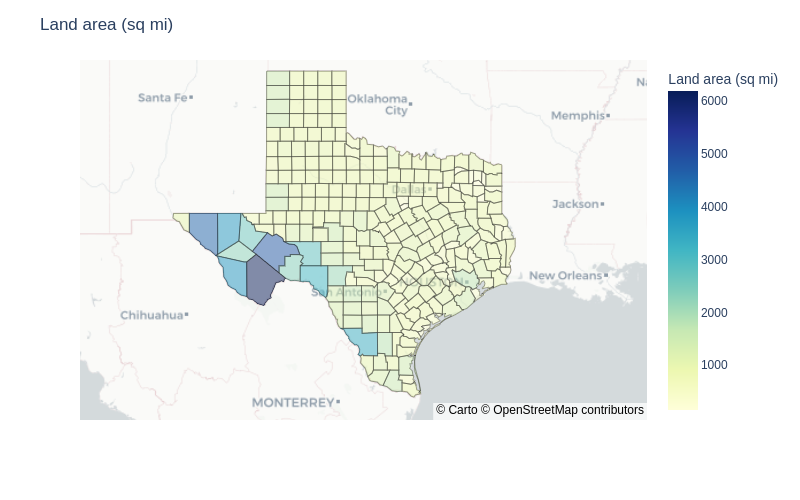

In [30]:
plot_choropleth_map(df=df, col='area_sq_mi')

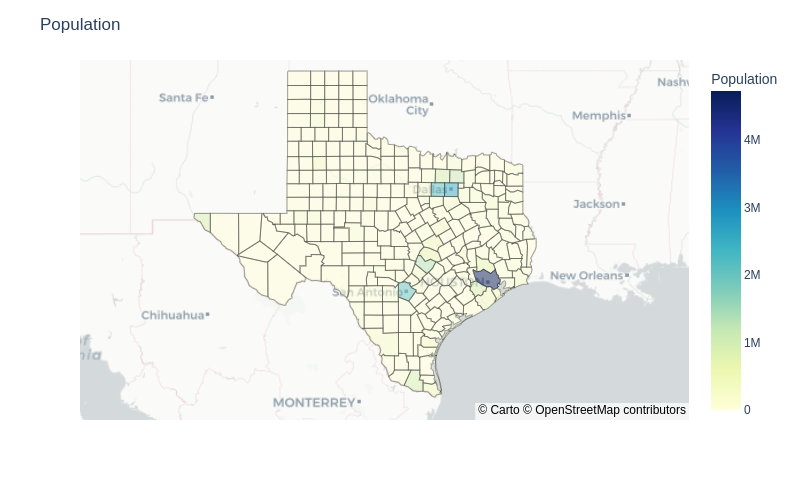

In [31]:
plot_choropleth_map(df=df, col='population')

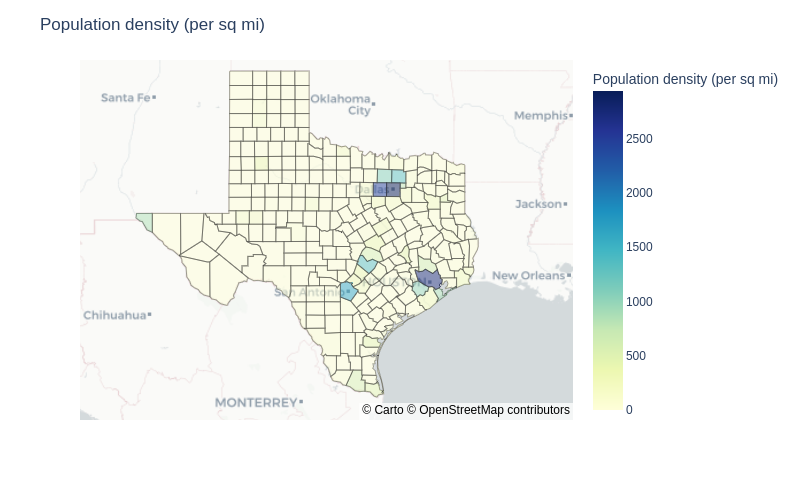

In [32]:
plot_choropleth_map(df=df, col='pop_per_sq_mi')